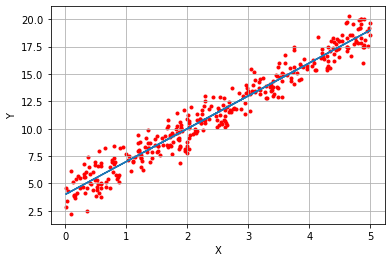

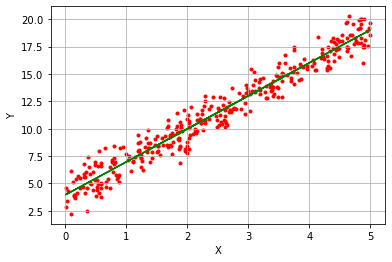

A start:  3
A predict:  3.012734117111254
B start:  4
B predict:  3.9586127847014723


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from math import fabs

#створюємо синтетичний набір точок
np.random.seed(0)
num_points = 350
A = 3
B = 4
noise = np.random.normal(0, 1, num_points)
X = np.random.uniform(0, 5, num_points)
Y = A * X + B + noise
plt.scatter(X, Y, marker = '.', color = 'r')

#робимо графік
plt.plot(X, A * X + B)
plt.xlabel('X')
plt.ylabel('Y')
plt.grid()
plt.show()

D_a = 0
D_b = 0
a = 1
b = 1

#швидкість навчання
L = 0.06


n = float(len(X))

#лінійна регресія
while True:
    D_a_past = D_a
    D_b_past = D_b
    Y_pred = a*X + b
    D_a = (-2/n) * sum(X * (Y - Y_pred))
    D_b = (-2/n) * sum(Y - Y_pred)
    a = a - L * D_a
    b = b - L * D_b
    if fabs(D_a - D_a_past)<0.0001 or (fabs(D_b - D_b_past)<0.0001):
        break;

Y_pred = a*X + b


#виводимо результати
plt.show()

plt.scatter(X, Y, marker = '.', color = 'r')
plt.plot(X, Y_pred, color='green')

plt.xlabel('X')
plt.ylabel('Y')
plt.grid()
plt.show()

print ('A start: ', A)
print ('A predict: ', a)
print ('B start: ', B)
print ('B predict: ', b)

Accuracy:  0.9471428571428572


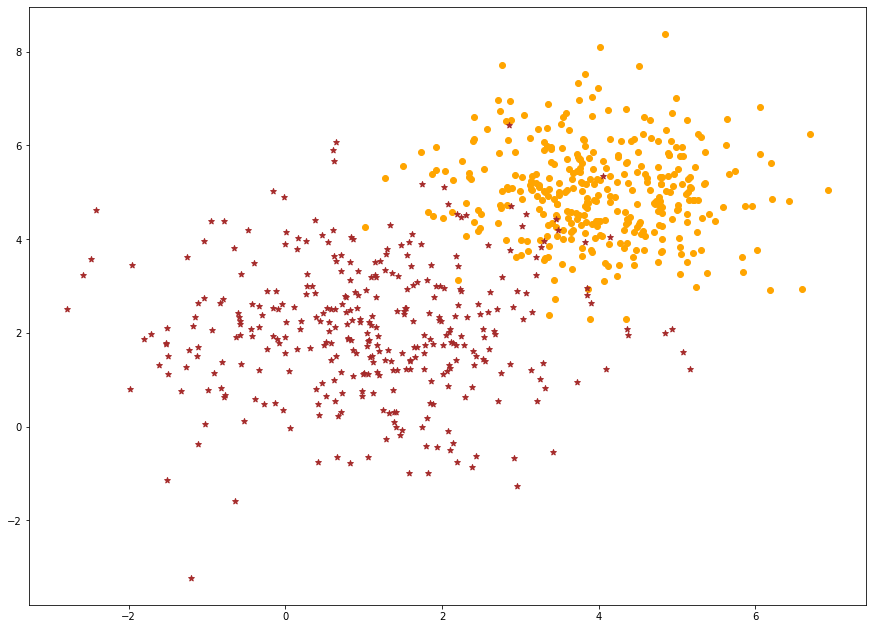

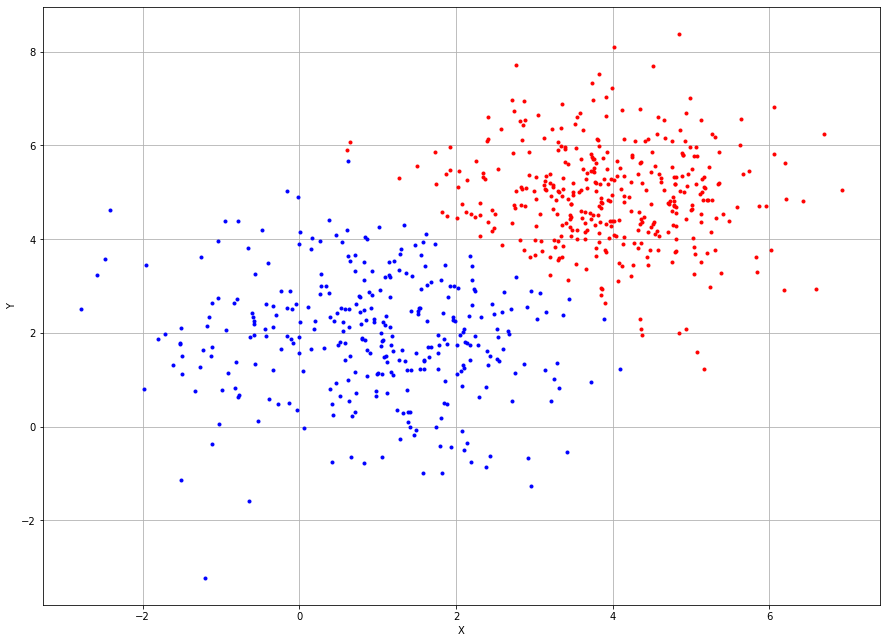

In [20]:
num_points = 350
a0=np.array([0,0])
b0=0
lr_a=0.03
lr_b=0.3
mean_1 = [4, 5]
cov_1 = [[1, 0], [0, 1]]
x_1 = np.random.multivariate_normal(mean_1, cov_1, num_points)
mean_2 = [1, 2]
cov_2 = [[2, 0], [0, 2]]
x_2 = np.random.multivariate_normal(mean_2, cov_2, num_points)

plt.figure(figsize=(15,11))
plt.scatter(x_1[:, 0], x_1[:, 1], marker = 'o', color='orange')
plt.scatter(x_2[:, 0], x_2[:, 1], marker = '*', color='brown')


def sigmoid(value):
    return 1 / (1 + np.exp(-value))

def grad(x, y, iters, lr_a, lr_b):
    a = a0
    b = b0
    for i in range(iters):
        f = sigmoid(x.dot(a) + b)
        da = np.dot(x.T, (f - y))/x.shape[0]
        db = (f - y).mean()
        a = a - lr_a * da
        b = b - lr_b * db
    return a, b
#prediction func
def predict(x, a, b):
    predict = np.zeros(x.shape[0])
    f = sigmoid(x.dot(a) + b)
    for i in range(x.shape[0]):
        if(f[i] >= 0.5):
            predict[i] = 1
    return predict


iters = 1000

x = np.concatenate([x_1,x_2])
y = np.hstack((np.array([0] * num_points), np.array([1]*num_points)))

a, b = grad(x, y, iters,  lr_a, lr_b)
res = predict(x,a,b)
print("Accuracy: ", 1 - abs(y-res).mean())

plt.figure(figsize=(15,11))
plt.plot(x[:,0][res==0], x[:,1][res==0], 'r.')
plt.plot(x[:,0][res==1], x[:,1][res==1], 'b.')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid()
plt.show()